# circuits were generated incorrectly. Circuits for all Pauli labels are the same and are acutally circuits for XX.

In [1]:
import sys
import os
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
import itertools
import pdb
from scipy.optimize import curve_fit
from copy import copy, deepcopy

sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
from SPAM import *
import json


In [2]:

import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
from EAB_CB_data_analysis import *
import bootstrap

In [3]:
Set_Mapping([4,5,3,2,1,])
nqubit=2
C=20
all_circuits={}
depth=[2,8,16,32,40]

load circuits and save them into a dictionary with the following stucture:
all_circuits={}
              -XX
                  -2=[list]
                  -8=[list]
                  -32=[list]
              -XY
                  -2
                  -8
                  -32
              ...

load all data file name into a dictionary
all_data={}
              -XX
                  -2=[list of data filenames]
                  -8=[list of data filenames]
                  -32=[list of data filenames]
              -XY
                  -2
                  -8
                  -32
              ...

load circuit

In [4]:
pauli_sample_list = [''.join(s) for s in itertools.product(['X','Y','Z'], repeat = nqubit)]
circ_path="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/CBFTXX45/"

for pauli in pauli_sample_list:
    all_circuits[pauli]={}
    # for d in depth:
    #     all_circuits[pauli][d]=[]

for f in os.listdir(circ_path):
    if (f.find(".txt")!=-1):
        n=f.find("_")
        n1=f.find(".")
        Plabel=f[n-2:n]
#         print(Plabel)
        dlabel=f[n+3:n1]
#         print (dlabel)x
        
        file=open(circ_path+f)
        Lines= file.readlines()
#         c_d8=[]
        all_circuits[Plabel][int(dlabel)]=[]
        count = 0
        for line in Lines:
            all_circuits[Plabel][int(dlabel)].append(line)
            count += 1
#         print (count)
#         count=0

    
# # # print (all_circuits["XY"][2])
# print (depth)

# all_circuits=CB_load_circuit(nqubit,C,depth,pauli_sample_list,circ_path)

# load data from 0320

In [5]:
# data_path="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_FTXX45_alldata_03202024/"
# all_datafile={}
# all_datafile_ordered={}

# for pauli in pauli_sample_list:
#     all_datafile[pauli]={}
#     for d in depth:
#         all_datafile[pauli][d]=[]
# for pauli in pauli_sample_list:
#     all_datafile_ordered[pauli]={}
#     for d in depth:
#         all_datafile_ordered[pauli][d]=[]

# for folder in os.listdir(data_path):
#     if folder!=".DS_Store":
#         for folder2 in os.listdir(data_path+folder+"/"):
#             if folder2=="2" or folder2=="8" or folder2=="16" or folder2=="32" or folder2=="40":
#                 for f in os.listdir(data_path+folder+"/"+folder2+"/"):
#                     if f!=".DS_Store":
#                         all_datafile[folder][int(folder2)].append(f)
# #                 print (len(all_datafile[folder][int(folder2)]))
# # print (all_datafile)  
# L1=[]
# line_Idx="000"
# line_num=""
# p=0 #position indicator
# for pauli in pauli_sample_list:
#     for d in depth:
#         for f in all_datafile[pauli][d]:
# #             print (f)
#             if (f.find("Line")!=-1):
#                 n=f.find("_")
#                 line_Idx=f[n+6:n+9]
#                 for i in range(3):
#                     if line_Idx[i]=="0":
#                         p+=1
#                     else:
#                         line_num=line_Idx[p:3]
#                         p=0
#                         break
#                 L1.append(int(line_num))
#             else:
#                 print (f) #print out non datafiles just for debugging 
#                 continue
#         # print (L1)
#         # print (all_datafile[pauli][d])
#         for Idx in range (len(all_datafile[pauli][d])):
#             for i in range (len(all_datafile[pauli][d])):
#                 # print (i)
#                 if L1[i]==Idx+1:
#                     all_datafile_ordered[pauli][d].append(all_datafile[pauli][d][i])
#                     break
#         L1=[]
#         line_Idx="000"
#         line_num=""
#         p=0 #position indicator
# all_datafile_ordered_0227=all_datafile_ordered.copy()
# data_path_0227=data_path

In [7]:
data_path="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_FTXX45_alldata_03202024/"
all_datafile={}
all_datafile_ordered={}

for pauli in pauli_sample_list:
    all_datafile[pauli]={}
    for d in depth:
        all_datafile[pauli][d]=[]
for pauli in pauli_sample_list:
    all_datafile_ordered[pauli]={}
    for d in depth:
        all_datafile_ordered[pauli][d]=[]

for folder in os.listdir(data_path):
    if folder!=".DS_Store":
        for folder2 in os.listdir(data_path+folder+"/"):
            if folder2=="2" or folder2=="8" or folder2=="16" or folder2=="32" or folder2=="40":
                for f in os.listdir(data_path+folder+"/"+folder2+"/"):
                    if f!=".DS_Store":
                        all_datafile[folder][int(folder2)].append(f)
                        # print (f)
#                 print (len(all_datafile[folder][int(folder2)]))
# print (all_datafile)  
L1=[]
line_Idx="000"
line_num=""
p=0 #position indicator
for pauli in pauli_sample_list:
    for d in depth:
        for f in all_datafile[pauli][d]:
#             print (f)
            if (f.find("Line")!=-1):
                n=f.find("_")
                line_Idx=f[n+6:n+9]
                for i in range(3):
                    if line_Idx[i]=="0":
                        p+=1
                    else:
                        line_num=line_Idx[p:3]
                        p=0
                        break
                L1.append(int(line_num))
                # print (line_num)
            else:
                print (f) #print out non datafiles just for debugging 
                continue
        # print (L1)
        # print (all_datafile[pauli][d])
        for Idx in range (len(all_datafile[pauli][d])):
            for i in range (len(L1)):
                # print (i)
                # print (L1)
                if L1[i]==Idx+1:
                    all_datafile_ordered[pauli][d].append(all_datafile[pauli][d][i])
                    break
        L1=[]
        line_Idx="000"
        line_num=""
        p=0 #position indicator

In [8]:
# a=Quantum_State(5)

a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

a=Quantum_State(5)
# a_2=Quantum_State(5)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM2/SPAM2.csv")


2024-03-20-185407_Line_001.txt
RY+42:RY+52:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY-42:RY-52



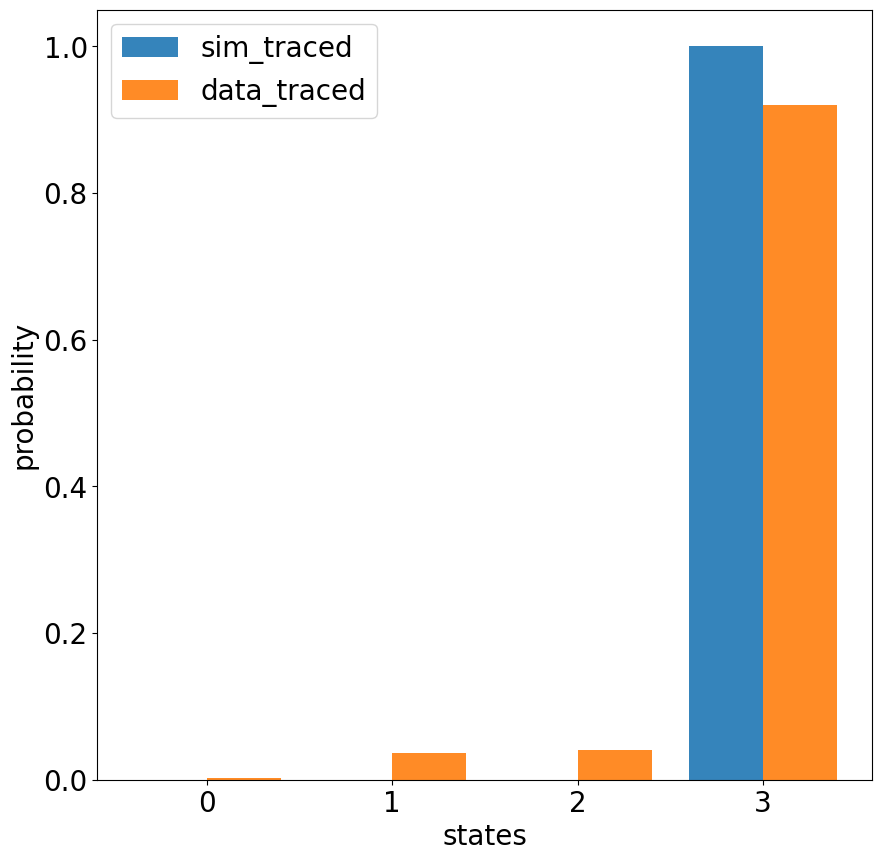

2024-03-20-185423_Line_002.txt
RY+42:RY+52:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:RY-42:RY-52



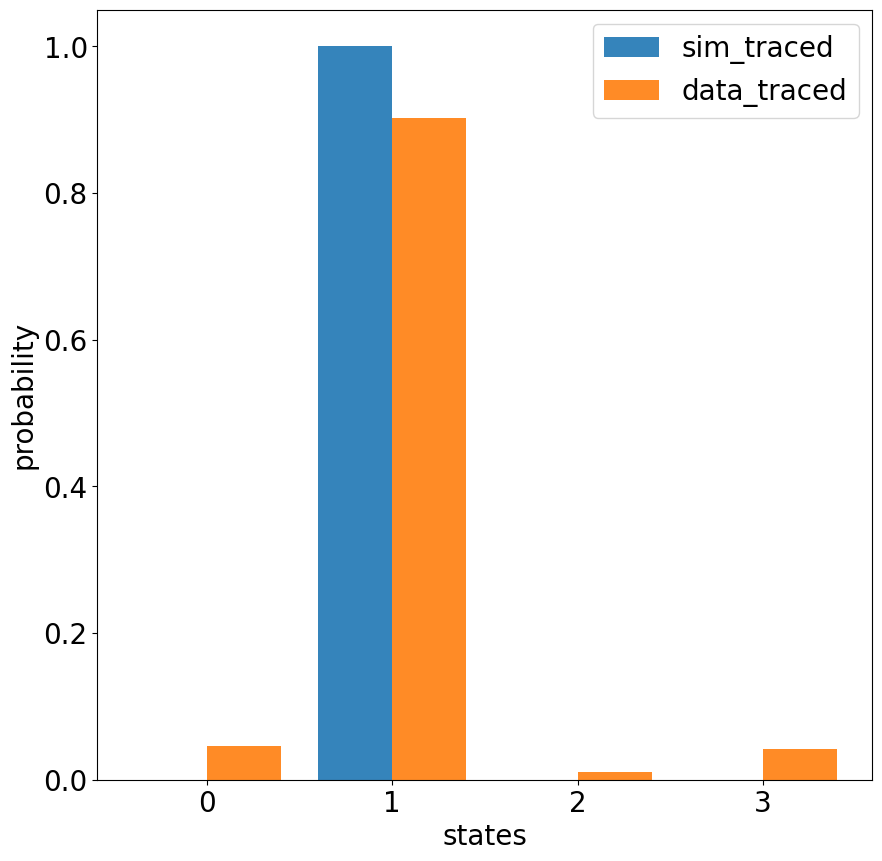

2024-03-20-185439_Line_003.txt
RY+42:RY+52:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:RY-42:RY-52



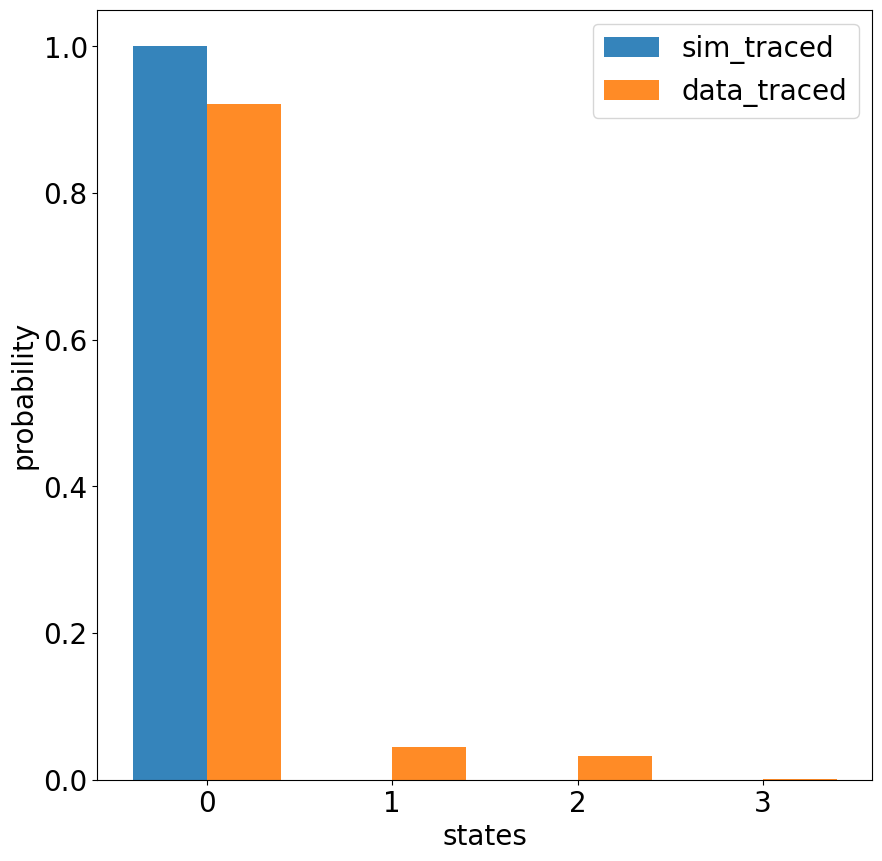

2024-03-20-185455_Line_004.txt
RY+42:RY+52:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RY+51:RY-42:RY-52



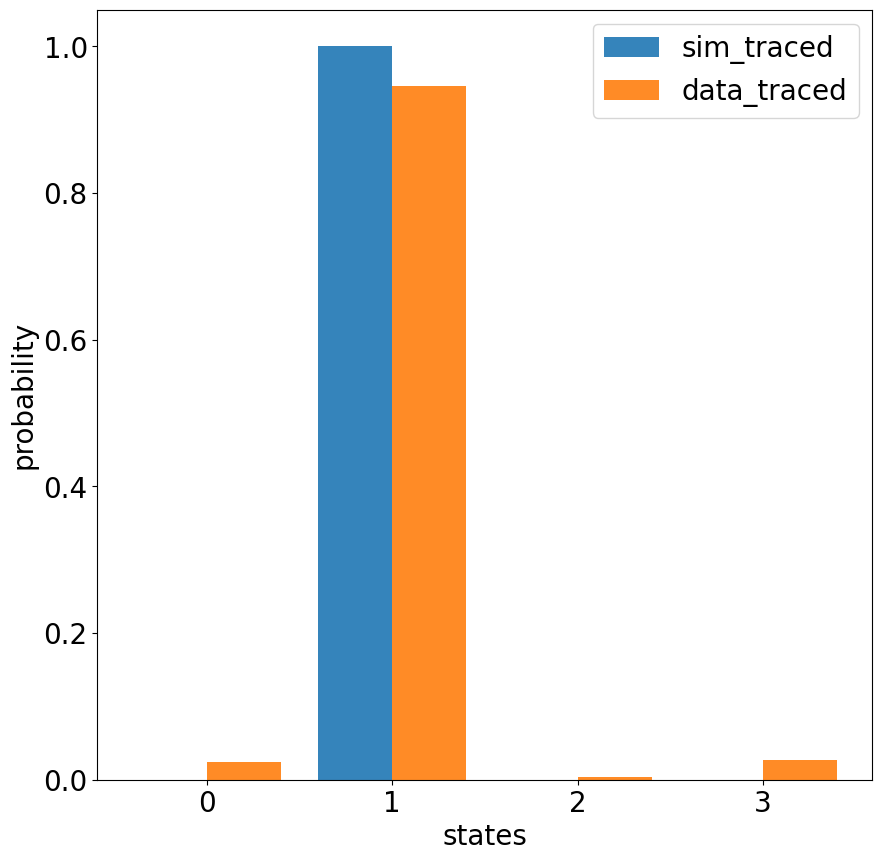

2024-03-20-185511_Line_005.txt
RY+42:RY+52:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:RY-42:RY-52



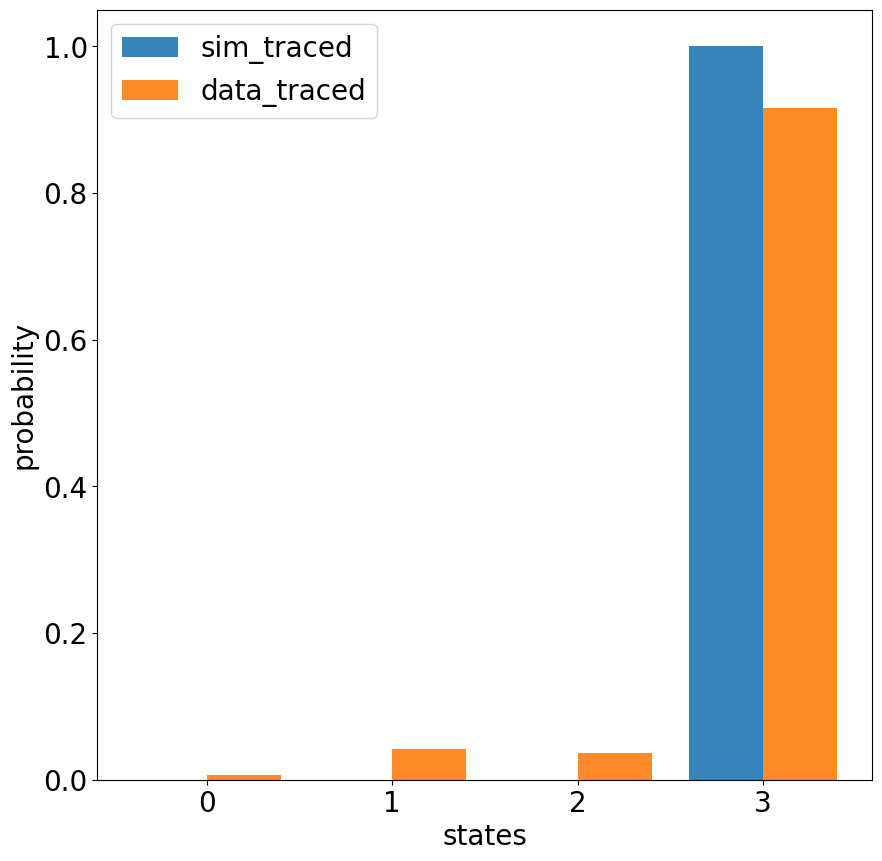

2024-03-20-185546_Line_006.txt
RY+42:RY+52:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:RY-42:RY-52



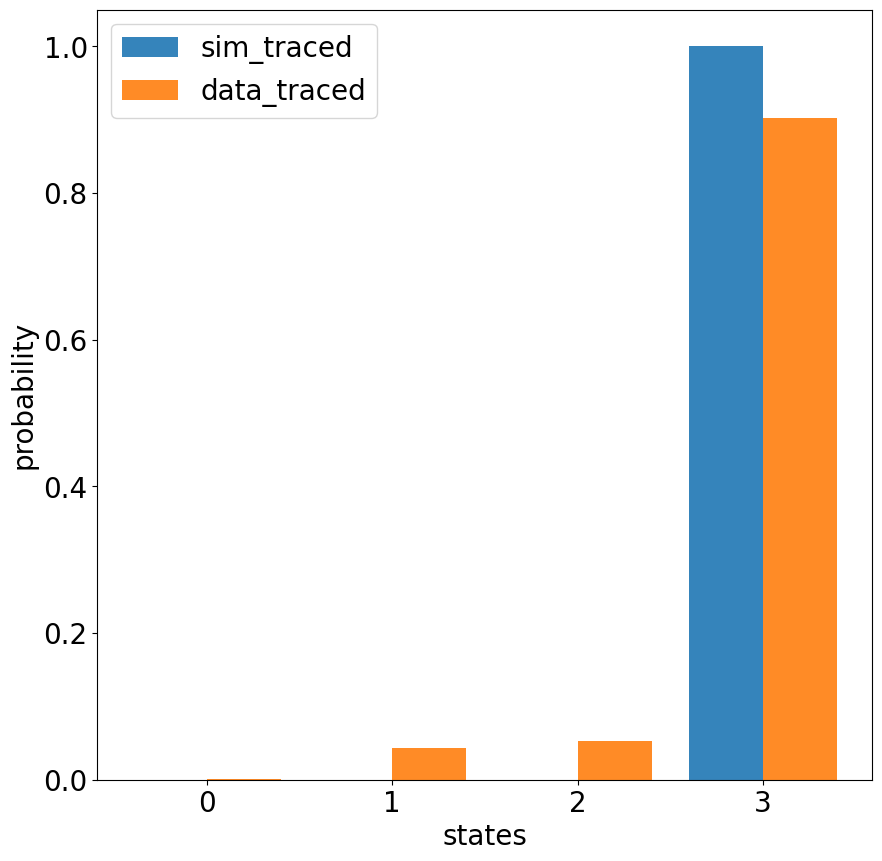

2024-03-20-185602_Line_007.txt
RY+42:RY+52:RX+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+51:RY-42:RY-52



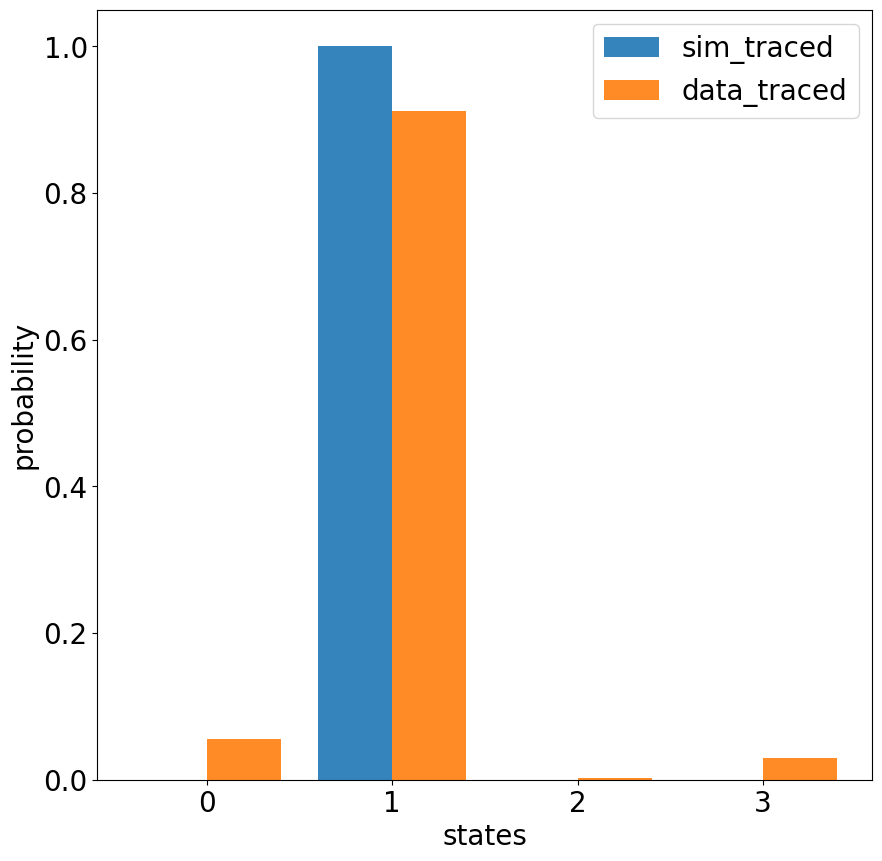

2024-03-20-185618_Line_008.txt
RY+42:RY+52:RY+41:FTXA450.2500+:FTXA450.2500+:RX+51:RY-42:RY-52



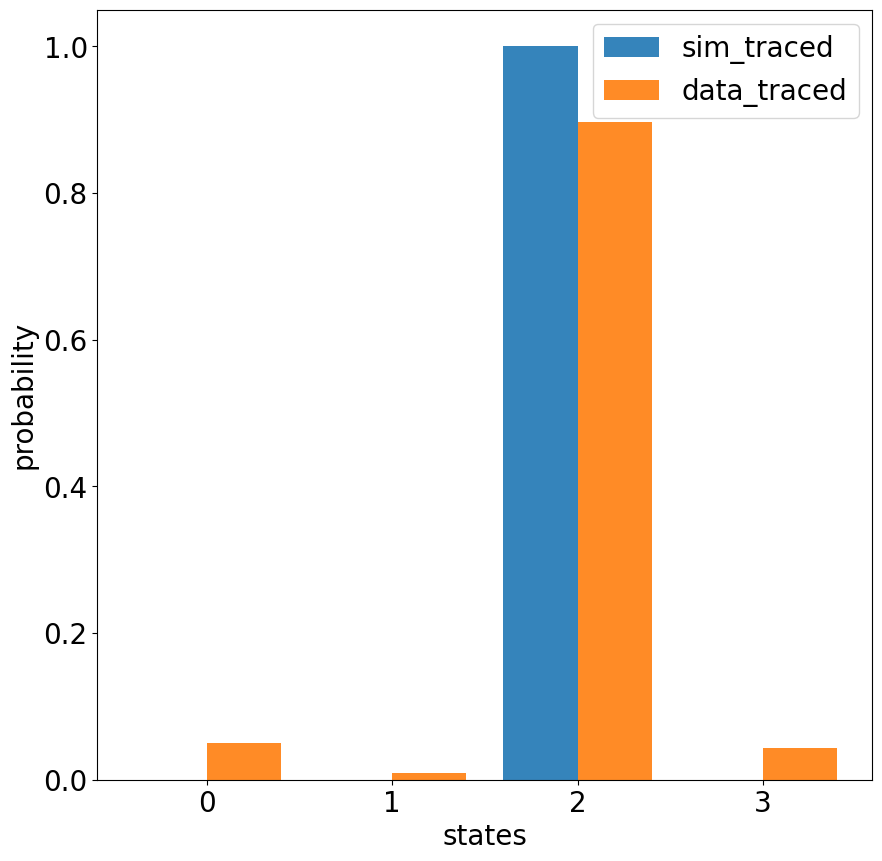

2024-03-20-185634_Line_009.txt
RY+42:RY+52:RY+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY-42:RY-52



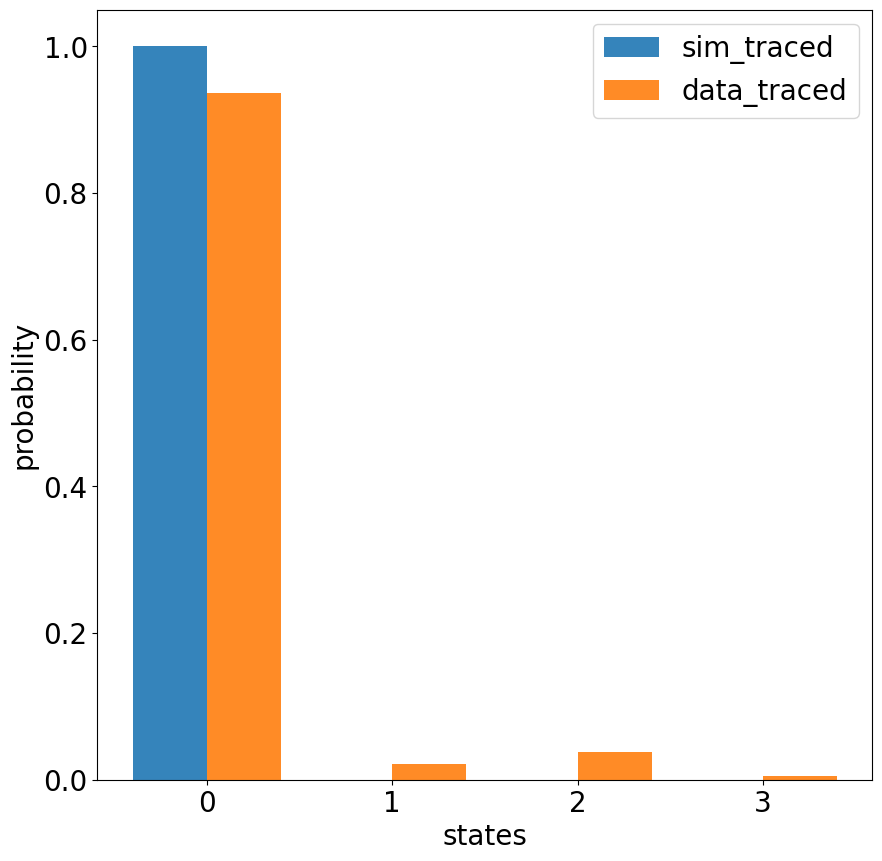

2024-03-20-185650_Line_010.txt
RY+42:RY+52:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY-42:RY-52



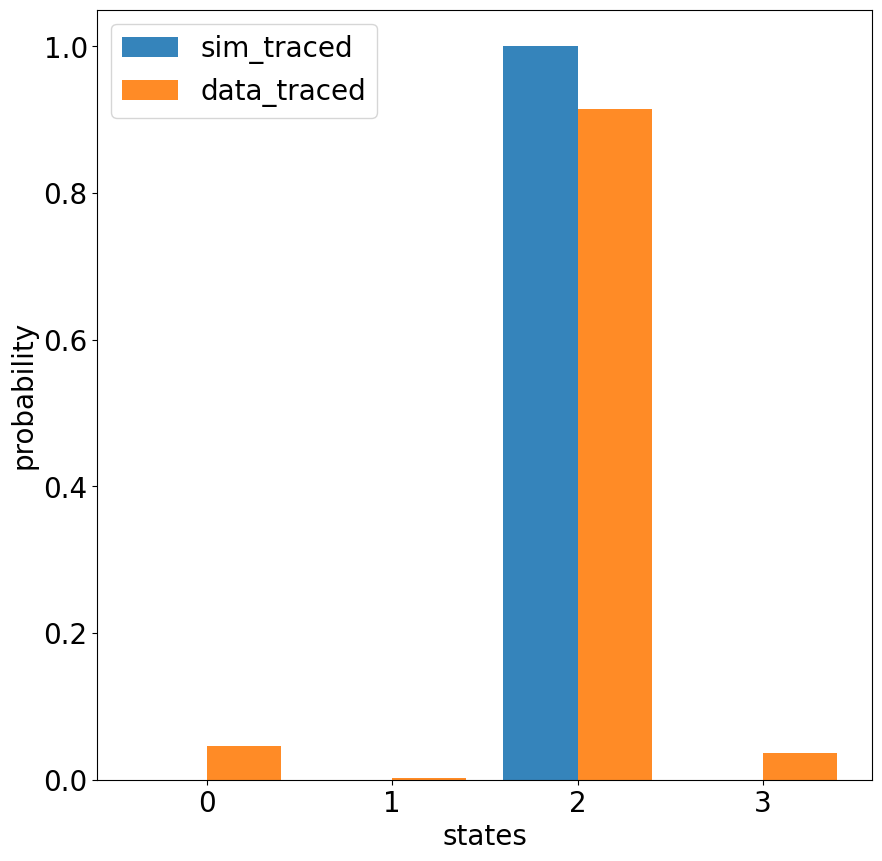

2024-03-20-223341_Line_011.txt
RY+42:RY+52:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RY-42:RY-52



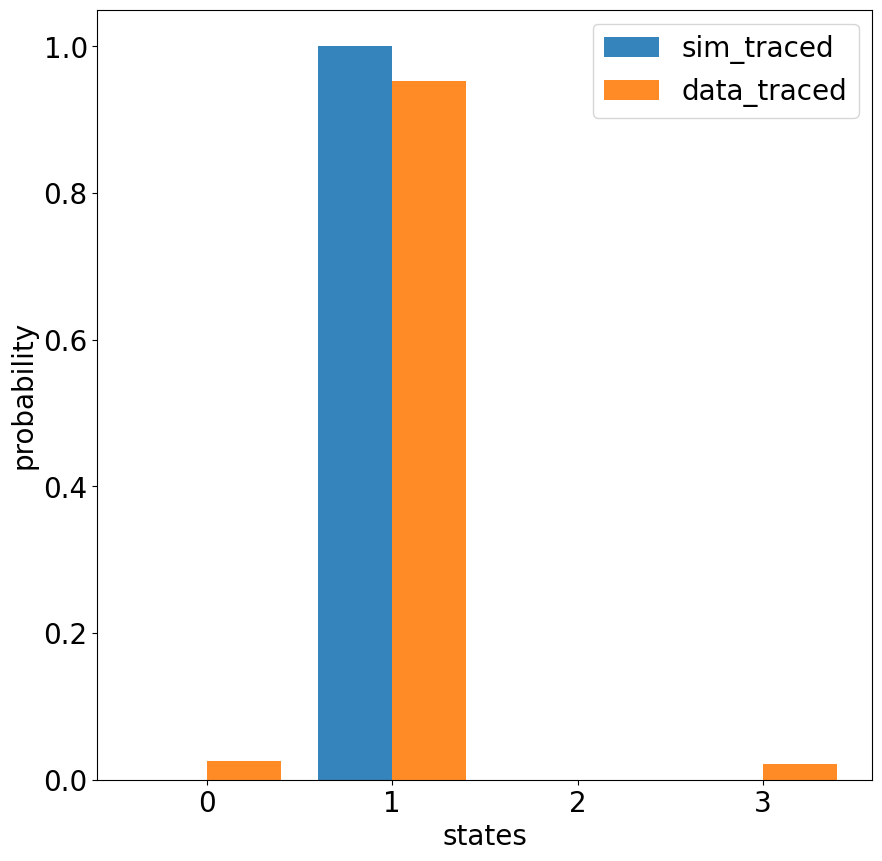

2024-03-20-223357_Line_012.txt
RY+42:RY+52:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:RY-42:RY-52



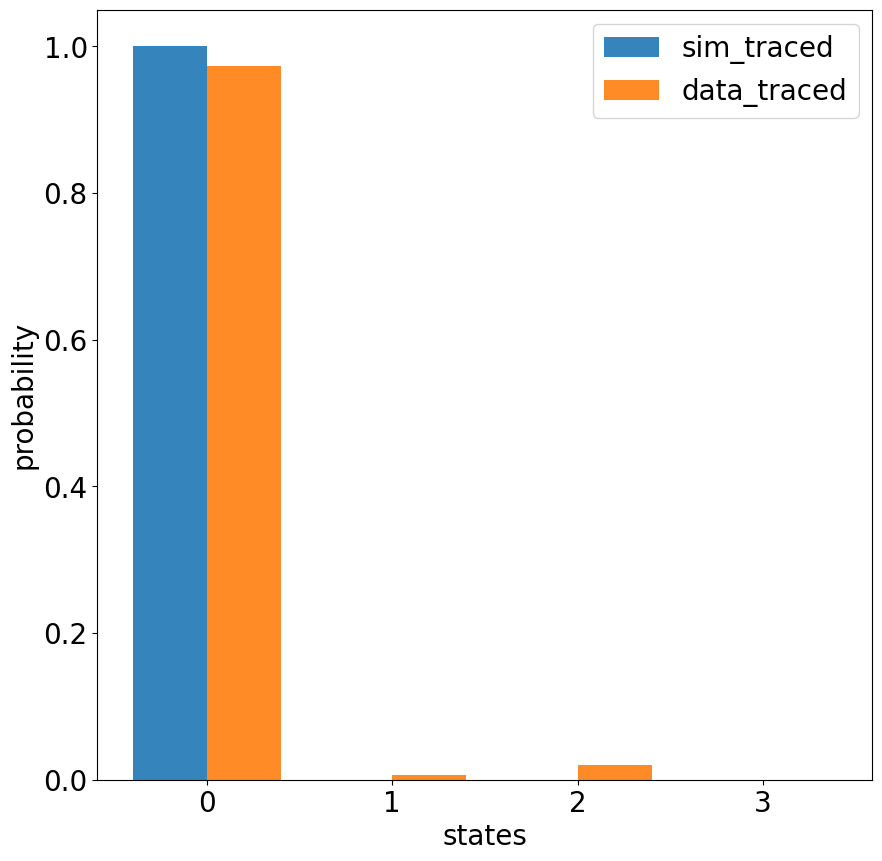

2024-03-20-223413_Line_013.txt
RY+42:RY+52:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:RY-42:RY-52



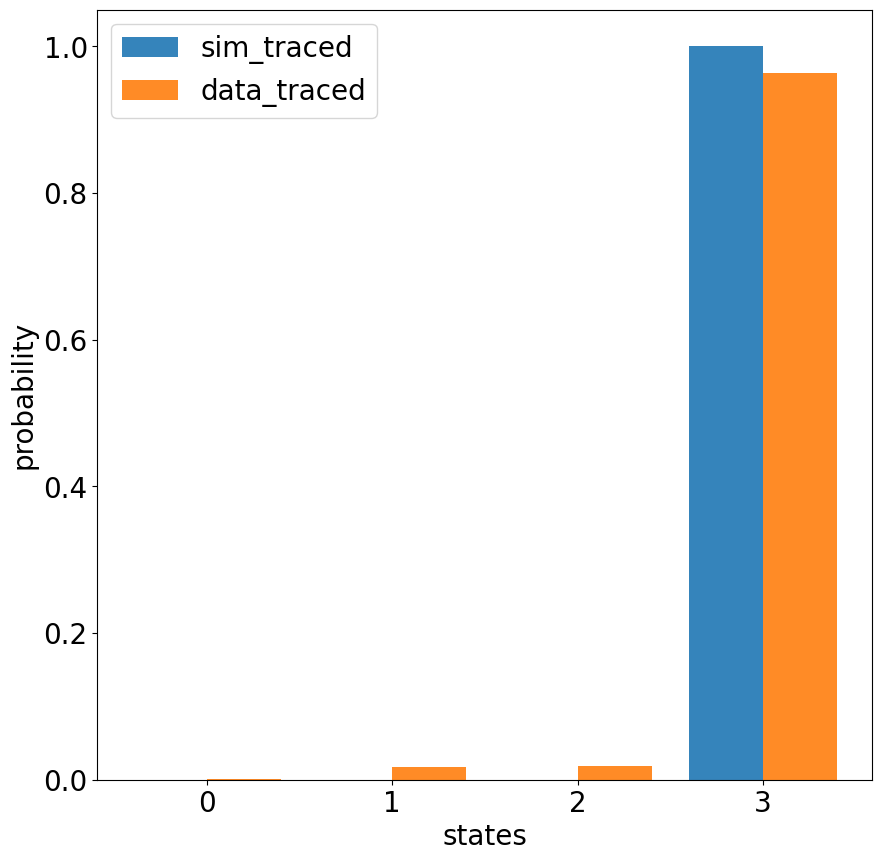

2024-03-20-223429_Line_014.txt
RY+42:RY+52:RX+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:RY-42:RY-52



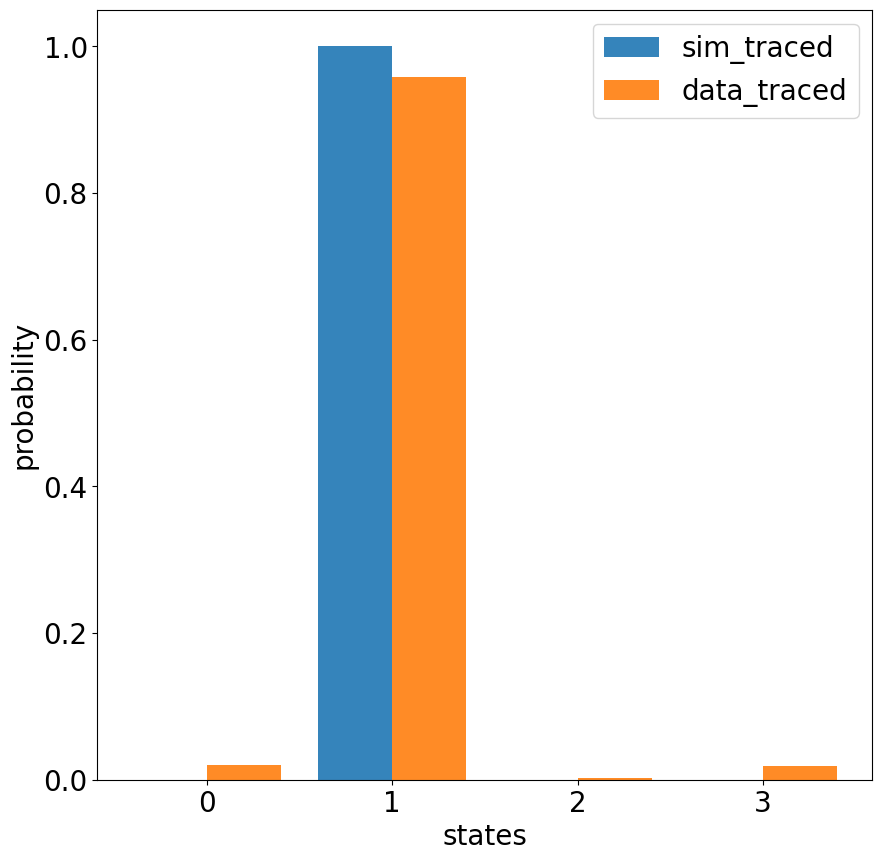

2024-03-20-223445_Line_015.txt
RY+42:RY+52:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:AZ5+1.0000:RY-42:RY-52



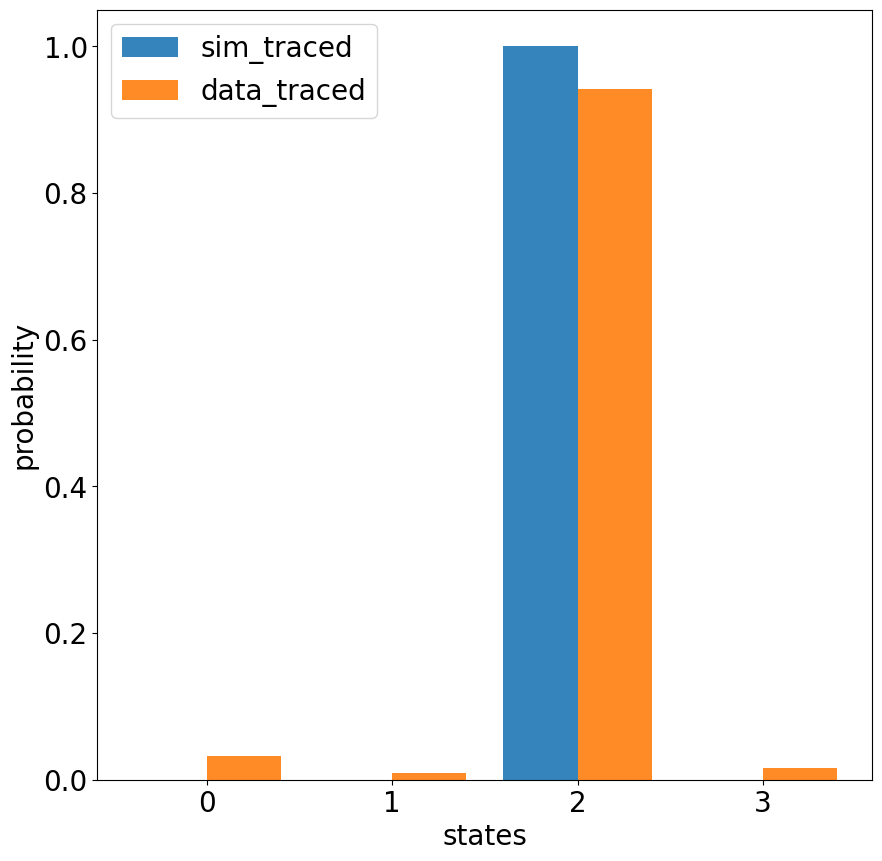

2024-03-20-223520_Line_016.txt
RY+42:RY+52:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+51:RY-42:RY-52



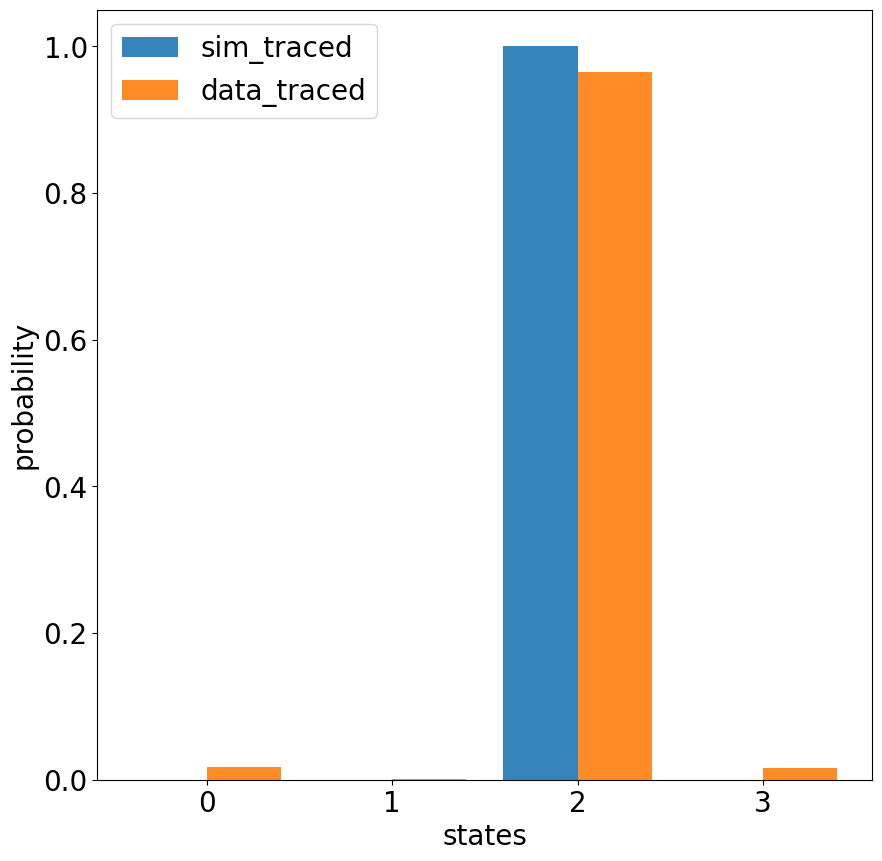

2024-03-20-223536_Line_017.txt
RY+42:RY+52:RX+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:RY-42:RY-52



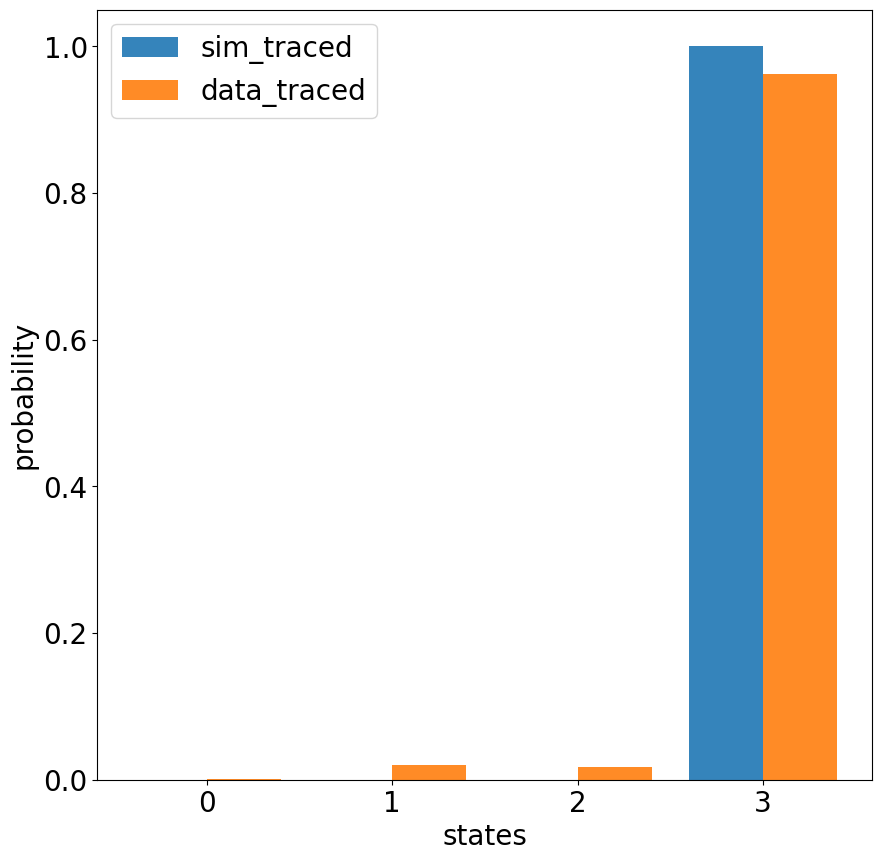

2024-03-20-224207_Line_018.txt
RY+42:RY+52:RY+41:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY-42:RY-52



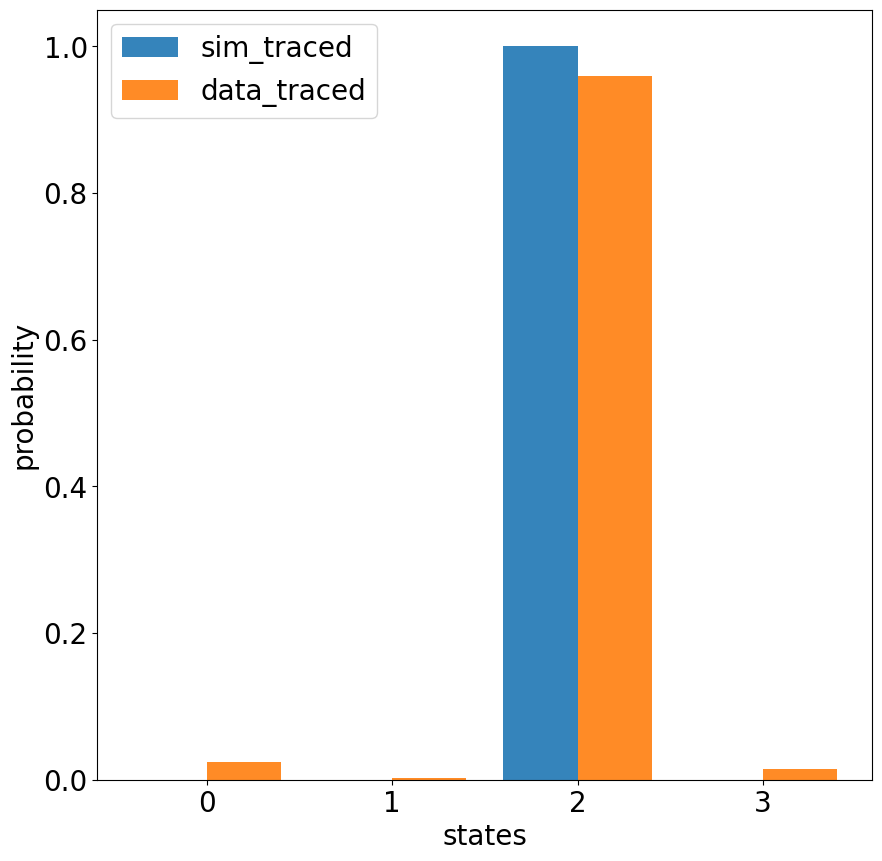

2024-03-20-224223_Line_019.txt
RY+42:RY+52:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:RY-42:RY-52



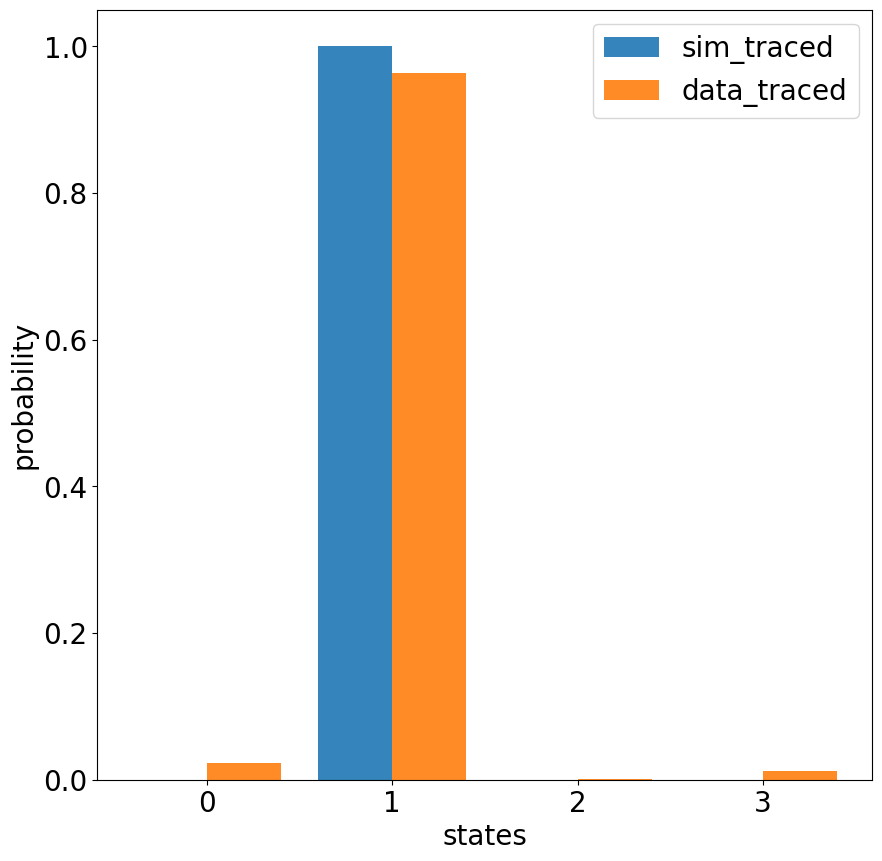

2024-03-20-224239_Line_020.txt
RY+42:RY+52:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RY+51:RY-42:RY-52



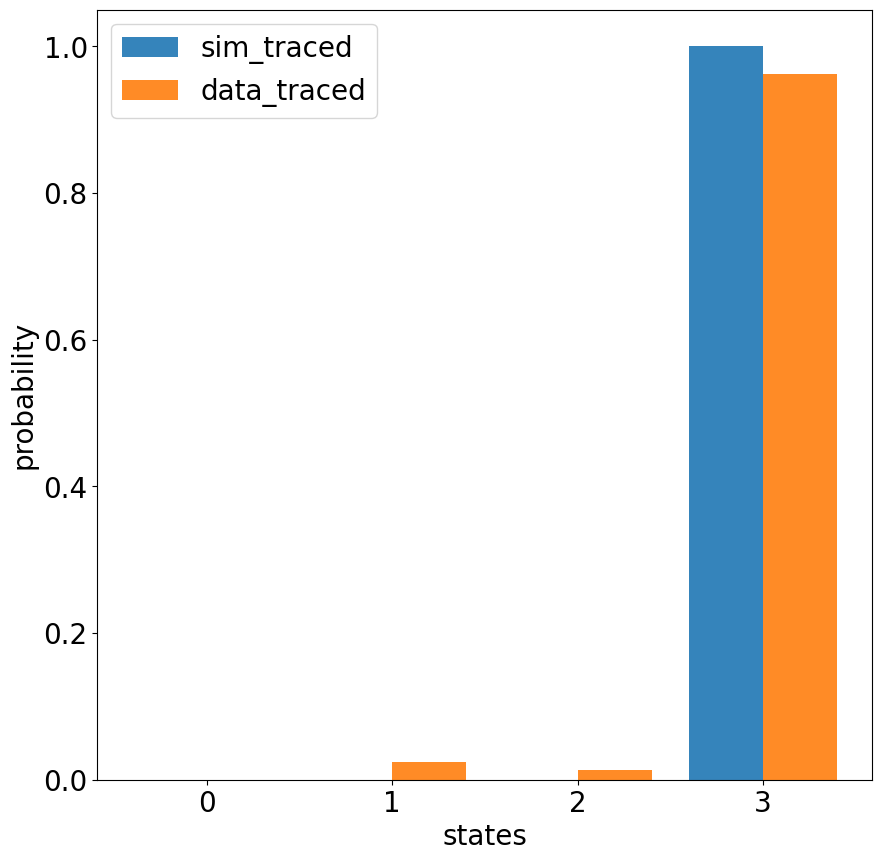

In [10]:
filenames_data=[]
circuit=[]

# counts_d2=[]
# counts_d2_spam=[]
# counts_d2_sim=[]
# shots=2000
# counts=[]
# counts_spam=[]
# counts_sim=[]

PauliLabel="XX"
DepthIndex=2
filenames_data=all_datafile_ordered[PauliLabel][DepthIndex]
# filenames_data_0227=all_datafile_ordered_0227[PauliLabel][DepthIndex]
# print (filenames_data_0227)
# print (len(filenames_data))
paf_data=data_path+PauliLabel+"/"+str(DepthIndex)+"/"
# paf_data_0227=data_path_0227+PauliLabel+"/"+str(DepthIndex)+"/"
circuit=all_circuits[PauliLabel][DepthIndex]


for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1])
#     counts=[round(shots*x) for x in  data_traced.population]
#     print ("counts:", counts)
#     counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
#     print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
#     counts_d2.append(counts_ibm_mapping_dic)
    
#     a_s=spam1.Correct_SPAM(a)
#     a_s.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
#     data_traced_spam=Trace_Out(a_s,[1,2])
#     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
#     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
#     counts_d2_spam.append(counts_ibm_mapping_dic_spam)
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1])
    # if (i<10):
        
    #     a_2.Import(paf_data_0227+filenames_data_0227[i],keep_file=True)
    #     print (filenames_data_0227[i])
    #     a_2_traced=Trace_Out(a_2,[0,1])
    #     Display_States_Population(states=[sim_traced,data_traced,a_2_traced],label=["sim_traced","data_traced","0227"])

    # else:
        
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])


In [11]:
filenames_data=[]
circuit=[]

# counts_d2=[]
# counts_d2_spam=[]
# counts_d2_sim=[]
shots=2000
nqubit=2
counts=[]
# counts_spam=[]
# counts_sim=[]
all_counts={}

pauli_sample_select_list=["XX"]
# paf_data="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB/oct2023alldata/"
for PauliLabel in pauli_sample_select_list:
    all_counts[PauliLabel]={}
    for DepthIndex in depth:
        all_counts[PauliLabel][DepthIndex]=[]
        filenames_data=all_datafile_ordered[PauliLabel][DepthIndex]
        paf_data=data_path
        paf_data+=PauliLabel+"/"+str(DepthIndex)+"/"
        circuit=all_circuits[PauliLabel][DepthIndex]


        for i in range (len(filenames_data)):
            print (filenames_data[i])
            a.Import(paf_data+filenames_data[i],keep_file=True)
            data_traced=Trace_Out(a,[0,1])
            counts=[round(shots*x) for x in  data_traced.population]
            print ("counts:", counts)
            counts_ibm_mapping, counts_ibm_mapping_dic=counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping_no_ancilla(counts,nqubit)
#             print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
            all_counts[PauliLabel][DepthIndex].append(counts_ibm_mapping_dic)

        #     a_s=spam1.Correct_SPAM(a)
        #     a_s.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
        #     data_traced_spam=Trace_Out(a_s,[1,2])
        #     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
        #     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
        #     counts_d2_spam.append(counts_ibm_mapping_dic_spam)

        #     a_0703.Import(paf_data_d2_0703+filenames_d2_0703[i],keep_file=True)
        #     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])

        #     a_rerun.Import(paf_data_d2_rerun+filenames_d2_rerun[i],keep_file=True)
        #     data_rerun_traced=Trace_Out(a_rerun,[0,1,2,3])

#             b_c.Interpret_GatesLab_Sequence(circuit[i])
#             print (circuit[i])
#             b=b_c.Simulate()
#             sim_traced=Trace_Out(b,[1,2])
        #     counts_sim=[round(shots*x) for x in sim_traced.population]
        #     counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
        #     counts_d2_sim.append(counts_ibm_mapping_dic_sim)


#             Display_States_Population(states=[b,a],label=["simulation","data"])
        #     Display_States_Population(states=[sim_traced,data_traced,data_0703_traced,data_rerun_traced],label=["sim_traced","data_traced","0703_traced","0711rerun"])
        # #       
print ("done")

2024-03-20-185407_Line_001.txt
counts: [4, 74, 82, 1840]
2024-03-20-185423_Line_002.txt
counts: [91, 1804, 22, 83]
2024-03-20-185439_Line_003.txt
counts: [1842, 89, 66, 3]
2024-03-20-185455_Line_004.txt
counts: [47, 1891, 8, 54]
2024-03-20-185511_Line_005.txt
counts: [13, 83, 72, 1832]
2024-03-20-185546_Line_006.txt
counts: [3, 87, 106, 1804]
2024-03-20-185602_Line_007.txt
counts: [112, 1825, 5, 58]
2024-03-20-185618_Line_008.txt
counts: [101, 17, 1795, 87]
2024-03-20-185634_Line_009.txt
counts: [1873, 42, 76, 9]
2024-03-20-185650_Line_010.txt
counts: [92, 6, 1828, 74]
2024-03-20-223341_Line_011.txt
counts: [52, 1906, 0, 42]
2024-03-20-223357_Line_012.txt
counts: [1946, 14, 40, 0]
2024-03-20-223413_Line_013.txt
counts: [1, 35, 37, 1927]
2024-03-20-223429_Line_014.txt
counts: [41, 1917, 4, 38]
2024-03-20-223445_Line_015.txt
counts: [64, 18, 1885, 33]
2024-03-20-223520_Line_016.txt
counts: [36, 3, 1930, 31]
2024-03-20-223536_Line_017.txt
counts: [2, 39, 35, 1924]
2024-03-20-224207_Line_0

In [12]:
filename = '03202024_CB_FTXX45'
token = ''.join(random.choice([str(j) for j in range(10)]) for i in range(10))
filename += '_' + token
with open('/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB/03202024data/' + filename, 'wb') as outfile:
    pickle.dump(all_counts, outfile)
print (filename)

03202024_CB_FTXX45_8636225248


In [ ]:
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB/oct2023counts/Oct2023_CB_rawdata_counts_2428796181", "rb") as fp:   # Unpickling
#     cb_counts = pickle.load(fp)


In [ ]:
print (all_counts)

In [13]:
import copy
from copy import copy, deepcopy
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/CBFTXX45/sim_cb_cnot_2023sep_5082062550", "rb") as fp:   # Unpickling
    cb_load = pickle.load(fp)

cb_load_cpy=deepcopy(cb_load)
# eab_load_cpy_spam=deepcopy(eab_load[0:100])
# print (cb_load["XX"]["result"][21])

In [14]:
import itertools
nqubit=2
pauli_sample_list = [''.join(s) for s in itertools.product(['X','Y','Z'], repeat = nqubit)]
for PauliLabel in pauli_sample_list:
    
    cb_load_cpy[PauliLabel]["result"]=cb_load_cpy[PauliLabel]["result"][0:20]+cb_load_cpy[PauliLabel]["result"][40:120]

In [15]:
print (cb_load_cpy["XX"])

{'parameters': {'n': 2, 'shots': 2000, 'Lrange': [2, 4, 8, 16, 32, 40], 'C': 20}, 'result': [{'L': 2, 'circuit': <bound method QuantumCircuit.qasm of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x174a08ee0>>, 'clifford': {'stabilizer': ['+IZ', '-ZI'], 'destabilizer': ['-IX', '-XI']}, 'clifford_layer': 'XX', 'pauli': 'XX', 'counts': {'00': 0, '10': 0, '01': 0, '11': 2000}}, {'L': 2, 'circuit': <bound method QuantumCircuit.qasm of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x174a08f70>>, 'clifford': {'stabilizer': ['+IZ', '-ZI'], 'destabilizer': ['+IX', '-XI']}, 'clifford_layer': 'XX', 'pauli': 'XX', 'counts': {'00': 0, '10': 2000, '01': 0, '11': 0}}, {'L': 2, 'circuit': <bound method QuantumCircuit.qasm of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15adae820>>, 'clifford': {'stabilizer': ['+IZ', '-ZI'], 'destabilizer': ['+IX', '+XI']}, 'clifford_layer': 'XX', 'pauli': 'XX', 'counts': {'00': 2000, '10': 0, '01': 0, '11': 0}}, {'L': 2, 'circuit': <b

In [16]:
C=20
depth=[2,8,16,32,40]
select_pauli_sample_list=["XX"]
for PauliLabel in select_pauli_sample_list:
    for j in range (len(depth)):
        for i in range (C*j, C*(j+1)):
            print (cb_load_cpy[PauliLabel]["result"][i]["L"])
            if j ==0:
                assert cb_load_cpy[PauliLabel]["result"][i]["L"]==2
            if j ==1:
                assert cb_load_cpy[PauliLabel]["result"][i]["L"]==8
            if j ==2:
                assert cb_load_cpy[PauliLabel]["result"][i]["L"]==16
            if j ==3:
                assert cb_load_cpy[PauliLabel]["result"][i]["L"]==32
            if j ==4:
                assert cb_load_cpy[PauliLabel]["result"][i]["L"]==40
            print (cb_load_cpy[PauliLabel]["result"][i]["counts"])
            print (all_counts[PauliLabel][depth[j]][i-C*j])

#             print (counts_d2[i].copy())
            print ("\n")
            cb_load_cpy[PauliLabel]["result"][i]["counts"]=all_counts[PauliLabel][depth[j]][i-C*j]



2
{'00': 0, '10': 0, '01': 0, '11': 2000}
{'00': 4, '10': 74, '01': 82, '11': 1840}


2
{'00': 0, '10': 2000, '01': 0, '11': 0}
{'00': 91, '10': 1804, '01': 22, '11': 83}


2
{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00': 1842, '10': 89, '01': 66, '11': 3}


2
{'00': 0, '10': 2000, '01': 0, '11': 0}
{'00': 47, '10': 1891, '01': 8, '11': 54}


2
{'00': 0, '10': 0, '01': 0, '11': 2000}
{'00': 13, '10': 83, '01': 72, '11': 1832}


2
{'00': 0, '10': 0, '01': 0, '11': 2000}
{'00': 3, '10': 87, '01': 106, '11': 1804}


2
{'00': 0, '10': 2000, '01': 0, '11': 0}
{'00': 112, '10': 1825, '01': 5, '11': 58}


2
{'00': 0, '10': 0, '01': 2000, '11': 0}
{'00': 101, '10': 17, '01': 1795, '11': 87}


2
{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00': 1873, '10': 42, '01': 76, '11': 9}


2
{'00': 0, '10': 0, '01': 2000, '11': 0}
{'00': 92, '10': 6, '01': 1828, '11': 74}


2
{'00': 0, '10': 2000, '01': 0, '11': 0}
{'00': 52, '10': 1906, '01': 0, '11': 42}


2
{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00':

In [17]:
filename = str(uuid.uuid4())
filename+="CB_data_processed_03052024"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_FTXX45_alldata_03202024/"+filename, "wb") as fp:
    pickle.dump(cb_load_cpy, fp)


In [18]:
print ("done")

done


Data analysis

plot average fidelity and fit

plot fidelity from each circuit and fit

data analysis with bootstrapping

spam results

In [ ]:

b=[]
c=[1,2]
f=c
c=[1]
print (d)
print (b)
print (c)

In [ ]:
for i in range(20,40):
    print (i)

In [ ]:
l=[1,2,3]
print (l[0:2])